In [2]:
import pandas as pd

train = pd.read_csv("train.csv")

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.shape

(614, 13)

In [4]:
# checking for missing values

train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
train.describe() #descriptive statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train.describe(include=[object])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
# dropping PassengerId, Name and Ticket

train = train.drop(['Loan_ID'], axis=1)

In [8]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


<Axes: xlabel='Loan_Status', ylabel='count'>

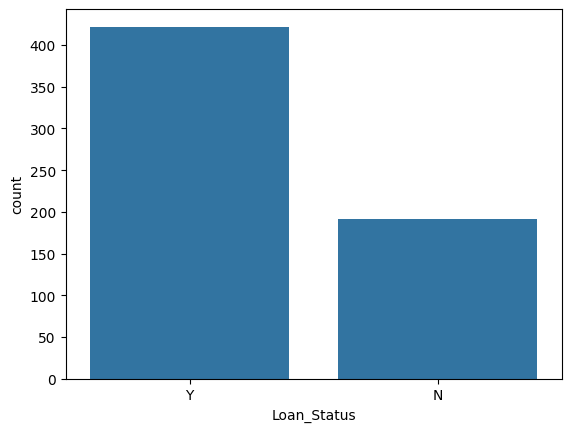

In [9]:
import seaborn as sns

sns.countplot(x=train['Loan_Status'])

<Axes: xlabel='Gender', ylabel='count'>

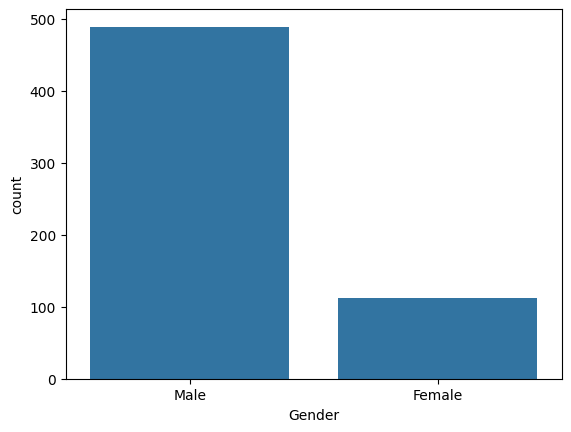

In [10]:
train['Gender'].value_counts()

sns.countplot(x=train['Gender'])

<Axes: xlabel='Gender', ylabel='count'>

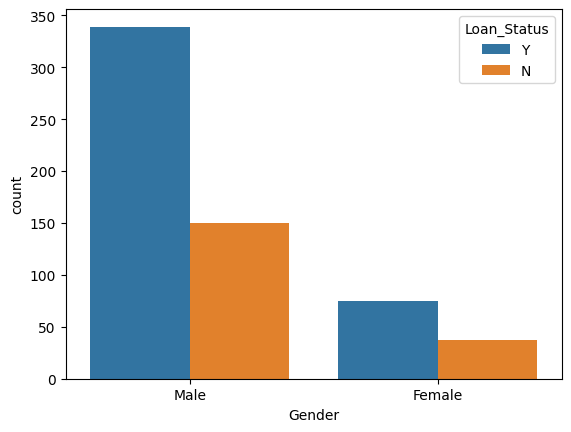

In [11]:
sns.countplot(x=train['Gender'], hue=train['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

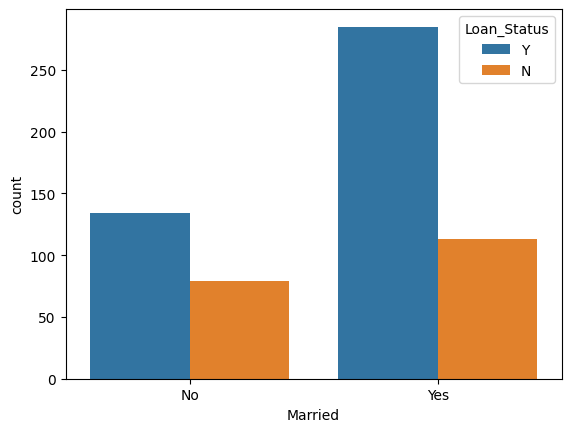

In [12]:
sns.countplot(x='Married', data=train, hue='Loan_Status')

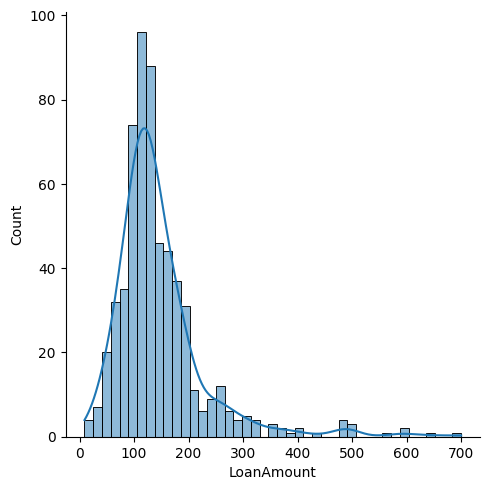

In [13]:
sns.displot(train['LoanAmount'], kde=True)





In [14]:
train['LoanAmount'].skew()

np.float64(2.677551679256059)

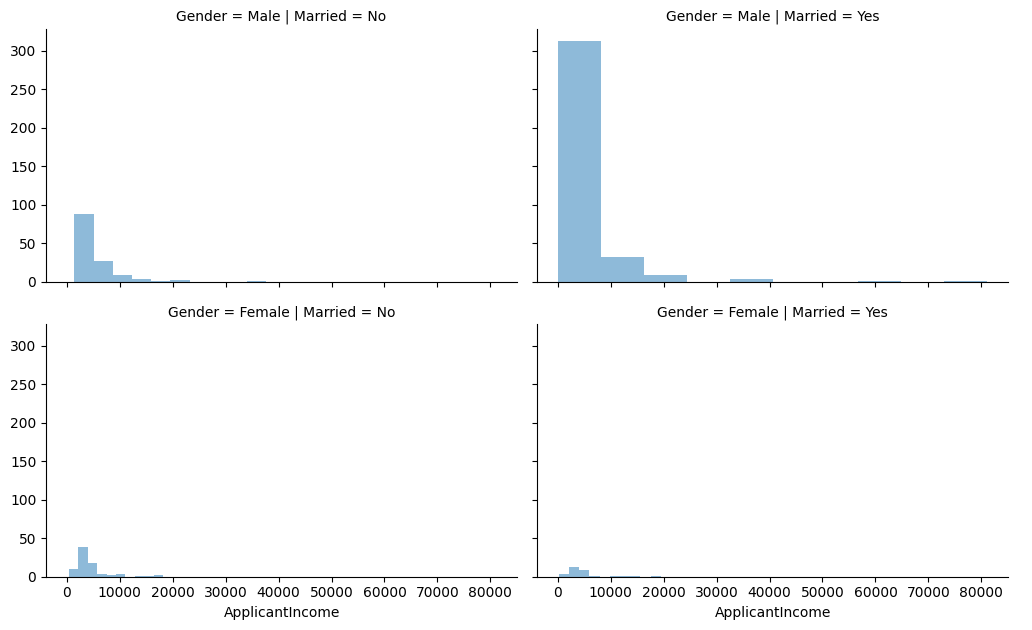

In [15]:
import matplotlib.pyplot as plt

grid = sns.FacetGrid(train, row='Gender', col='Married', height=3.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)

grid.add_legend()

In [16]:
rplot(train, hue='Loan_Status', height=2.5)

NameError: name 'rplot' is not defined

In [17]:
train.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [18]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [19]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

<ipython-input-19-09cb7eef99ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
<ipython-input-19-09cb7eef99ee>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [20]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['Credit_History'].skew()

train.isna().sum()

<ipython-input-20-0d501b3e74a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
<ipython-input-20-0d501b3e74a0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,50


In [21]:
from sklearn.preprocessing import LabelEncoder

feature_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

le = LabelEncoder()

for col in feature_col:

    train[col] = le.fit_transform(train[col])

In [23]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})

train.head(3)

<ipython-input-23-b41cf8da1d6b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [24]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

train.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0


In [25]:
train.columns

rel_feat =['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',

           'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'total_income','Loan_Status']

rel_feat_corr = train.corr()['Loan_Status'][['Gender', 'Married', 'Dependents', 'Education',

                                             'Self_Employed', 'LoanAmount', 'Loan_Amount_Term',

                                             'Credit_History', 'Property_Area', 'total_income']]

In [26]:
rel_feat_corr

,Loan_Status
Gender,0.017987
Married,0.091478
Dependents,0.010118
Education,-0.085884
Self_Employed,-0.003700
LoanAmount,-0.033214
Loan_Amount_Term,-0.022549
Credit_History,0.561678
Property_Area,0.032112
total_income,-0.031271


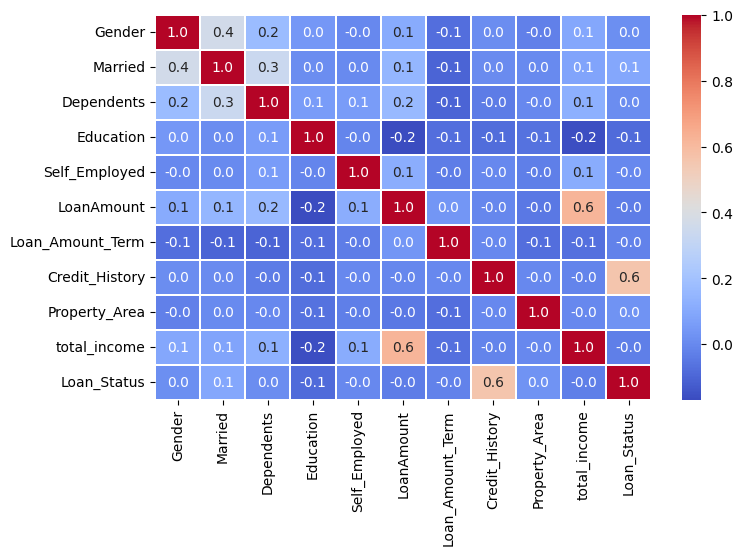

In [27]:
plt.figure(figsize=(8,5))

sns.heatmap(train[rel_feat].corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)

plt.show()

In [28]:
#Separating target variable and other variables

X=train.drop(columns='Loan_Status')

y=train['Loan_Status']

In [29]:
#Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=7)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')

rf = rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test).astype(int)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,rf_pred))

print(classification_report(y_test,rf_pred))

print("Accuracy:",accuracy_score(y_test, rf_pred))

[[ 30  31]
 [  9 115]]
              precision    recall  f1-score   support

           0       0.77      0.49      0.60        61
           1       0.79      0.93      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.78      0.78      0.77       185

Accuracy: 0.7837837837837838
